In [1]:
using SparseArrays, LinearAlgebra, DelimitedFiles, IndexedGraphs, Plots
using IntervalUnionArithmetic
#using Pkg
#Pkg.activate("../")
using Causality
using Graphs
using Dictionaries

# Generation of Epidemics

In [359]:
#=DS=readdlm("./RealGraph/High-School_data_2013.csv");
DS[:,1] .-= minimum(DS[:,1])
timescale = maximum(DS[:,1])/20
DS[:,1] ./= timescale=#


#=DS=readdlm("./RealGraph/InfectiousSP.txt");
DS[:,1] .-= minimum(DS[:,1])
timescale = maximum(DS[:,1])/20
DS[:,1] ./= timescale=#

DS=readdlm("./RealGraph/detailed_list_of_contacts_Hospital.dat_");
timescale = 20000
DS[:,1] ./= timescale

#DS=readdlm("./tij_SFHH.dat_");
#timescale = 7000;

In [360]:
nodes = unique(DS[:,[2,3]])
T = Float64(maximum(DS[:,1]))
N = length(nodes)
G = SimpleGraph(N)
id = Dictionary(nodes, [i for i = 1:N]); 
for st = 1:size(DS,1)
    add_edge!(G,id[DS[st,2]],id[DS[st,3]]) 
end
#jobs = Dictionary([i for i = 1:N],(unique([unique(DS[:,[2,4]], dims=1) ; unique(DS[:,[3,5]], dims=1)],dims=1))[:,2])
G = IndexedBiDiGraph(G)

{75, 2278} directed sparse Int64 graph
⣮⡻⠾⡇⠯⣽⠿⢿⣿⢭⠻⢿⠀⠹⠿⠿⠿⠌⠿⢿⠠⠨⠹⠛⠏⡿⠏⠇⠀⠐⠘⠬⢬⠔⠠⠷⠋⠅
⠾⠧⡮⡫⡿⣿⣿⠾⠾⣾⡤⢴⠐⡲⢿⠷⠶⢾⠿⠿⠶⠀⡶⢿⠜⠴⡷⠆⠆⠲⠤⠲⠴⡇⡢⠶⠆⠄
⣏⣧⣿⣯⣎⡹⣿⡿⢭⣯⣹⣽⠀⣼⣽⣭⣭⠭⣍⣯⣉⣈⣙⣸⠠⣹⣿⣃⣄⣘⠉⡱⢋⣥⡌⢟⡁⠄
⣿⣇⣻⡟⣿⡿⣮⡻⡴⣗⢇⣞⠄⢸⣿⡇⣄⠚⣞⣿⣶⣗⣿⣨⣈⢼⡛⠇⡍⢌⠀⢠⢑⡆⠀⡿⠇⡄
⡟⣟⣺⣧⡧⣷⢴⢯⢮⡳⣾⢳⠀⣴⣳⡗⢺⢄⣻⣴⣲⣗⣲⢂⢡⣯⡅⠄⠤⢠⠑⣤⢴⣤⠐⠀⠤⠄
⣿⣆⢀⣏⣗⣾⣩⢵⢾⣛⢀⡰⣀⢰⣲⣆⣴⢄⣼⡓⠩⠎⠩⠀⡆⢶⢖⣅⢉⠸⠀⢑⠪⡀⠀⢜⠅⠀
⣄⡀⢰⡠⣀⣤⣀⣁⢀⣤⢀⣘⠮⠃⣤⣄⣀⣀⣀⢀⣛⣘⣛⣸⣀⣀⣃⡀⡀⣀⠀⣀⣘⣓⡓⡀⡀⠀
⣿⡇⢿⡗⡗⣿⠿⠿⢽⠾⠸⢾⠀⢿⣮⡻⡿⠝⡿⢿⣿⡍⣽⣿⠾⢿⠷⡆⠂⠀⢈⠰⠾⠟⠯⡦⠶⠂
⡛⠇⣸⣇⡇⡟⣠⠙⠚⢖⠐⢟⠀⢸⣟⠏⡊⠈⡗⠈⠹⠋⠉⠛⠒⢚⠒⡀⠀⠐⠐⠚⠀⠁⠀⢁⠐⠀
⣿⣇⣿⡇⡧⣽⣾⣽⢛⣾⢶⠻⠀⢘⣿⣏⡙⠉⣮⡻⣜⣩⣭⢯⢚⢚⡷⣆⣆⣠⠂⣆⢬⡄⠀⢦⢢⠀
⡀⡂⠘⠃⡃⢸⢼⢿⢼⢾⡣⠆⣛⢸⡟⠿⡷⠂⡖⣹⠊⠀⠀⠀⠀⢸⠀⠠⢀⢀⠀⠀⠀⠀⠀⠀⠀⠀
⣷⠂⣼⣏⣓⣸⡛⣻⠸⢚⠃⠂⣛⣸⣷⣿⣧⠀⡧⣟⠀⠀⠀⠀⡀⢺⠀⣼⢸⠀⠀⢠⠀⠀⠀⡀⠀⠂
⣯⡥⢒⡅⣄⣢⣂⣜⡥⣶⢨⣍⠀⢸⣾⣇⣸⢀⣺⢐⣀⣀⣠⣈⠊⠀⣎⡒⠐⣀⡀⣹⡀⠀⠀⣩⣈⠀
⠯⠅⠹⠏⠿⢻⠿⠌⠁⠍⠜⢵⠉⠸⠹⠧⠘⠠⠹⢯⠀⡀⣀⣤⢪⠹⣤⡻⣸⠀⠀⠘⠀⠀⠀⡄⡀⠀
⢀⠀⢨⡁⣀⢹⡃⢍⠀⣃⣃⡐⠀⢨⠈⠀⢀⠀⠈⣹⠀⢐⠒⠒⠐⢠⠒⠚⢊⠐⠄⠢⠂⠀⠀⠂⢐⠀
⡒⡄⢠⡃⢇⡠⠀⣀⠑⣤⢄⢀⠀⢠⢂⡐⣰⠀⠨⢤⠀⠀⠀⣀⣄⣨⣀⠀⠠⡁⠀⠀⡀⠀⠀⡐⠀⡀
⢂⠗⠴⠧⠏⣴⠱⠴⠐⣷⠊⠢⢶⢸⣾⠇⠄⠀⠂⠷⠀⠀⠀⠀⠀⠈⠀⠀⠈⠀⠀⠈⠀⠀⠀⠀⠀⠀
⢤⡆⢨⡎⣦⢍⣤⡤⠐⠀⣀⢄⠙⠨⠫⡧⠄⢀⠠⣄⠀⠀⠀⠠⡄⣠⠀⠤⠠⠀⢀⠠⠀⠀⠀⠀⠀⠀
⠏⠄⠈⠅⠁⠌⠉⠥⠀⠇⠁⠁⠀⠈⠸⠃⠐⠀⠈⠒⠀⠀⠠⠀⠂⠘⠀⠈⠐⠐⠀⠠⠀⠀⠀⠀⠀⠀

In [361]:
H = sparse(G)
contacts = Dictionary([(i,j) for i=1:N for j=1:N if H[i,j] != 0 ] ,[i for i = 1:nnz(G.A)])
meet_time=20/timescale
masks = [intervalUnion(∅) for g=1:nnz(G.A)]
for st = 1:size(DS,1)
    masks[contacts[(id[DS[st,2]],id[DS[st,3]])]] = masks[contacts[(id[DS[st,2]],id[DS[st,3]])]] ∪ intervalUnion(DS[st,1]-meet_time,DS[st,1])
    #symmetrization
    masks[contacts[(id[DS[st,3]],id[DS[st,2]])]] = masks[contacts[(id[DS[st,3]],id[DS[st,2]])]] ∪ intervalUnion(DS[st,1]-meet_time,DS[st,1])
end
V = [MaskedRate(UnitRate(),mask) for mask in masks];

In [362]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 1 method)

In [254]:
#Initialize generation parameters


#=try this set:
λ = 0.005 / 20 * timescale
autoinf = GaussianRate(0.02, T/2, 1/ε)
inf_out = GaussianRate(λ, 5., 4.)
=#

#= and try also a Markovian dynamics, where you could put 
also the french dynamical method =#
ε = 1e-10
λ = 0.02 * timescale / 20
pseed = 1/N
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
inf_out = GaussianRate(λ, 4., 1.)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [255]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [256]:
const Igen = GenerativeSI{GaussianRate,GaussianRate} 
const Igauss = GaussianInferentialSI

GaussianInferentialSI

0.6


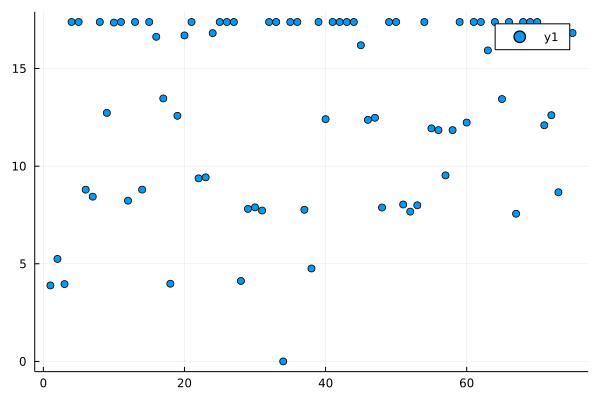

In [272]:
Mp = StochasticModel(Igen, T, θp, G, θpgen,V);
sample! = Sampler(Mp);
xtrue = zeros(N)
sample!(xtrue)
println(sum(xtrue .< T)/N)
scatter(xtrue)

In [273]:
nobs, p = N, 1e-5
O = [(ti = T; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]
f_rate = 1/10
Ofalse=[rand()< f_rate ? (o[1],!o[2],o[3],f_rate) : (o[1],o[2],o[3],f_rate) for o in O]

75-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 17.382, 0.1)
 (2, 1, 17.382, 0.1)
 (3, 1, 17.382, 0.1)
 (4, 0, 17.382, 0.1)
 (5, 0, 17.382, 0.1)
 (6, 1, 17.382, 0.1)
 (7, 0, 17.382, 0.1)
 (8, 0, 17.382, 0.1)
 (9, 0, 17.382, 0.1)
 (10, 1, 17.382, 0.1)
 (11, 0, 17.382, 0.1)
 (12, 1, 17.382, 0.1)
 (13, 0, 17.382, 0.1)
 ⋮
 (64, 0, 17.382, 0.1)
 (65, 1, 17.382, 0.1)
 (66, 0, 17.382, 0.1)
 (67, 1, 17.382, 0.1)
 (68, 1, 17.382, 0.1)
 (69, 0, 17.382, 0.1)
 (70, 0, 17.382, 0.1)
 (71, 1, 17.382, 0.1)
 (72, 1, 17.382, 0.1)
 (73, 1, 17.382, 0.1)
 (74, 1, 17.382, 0.1)
 (75, 1, 17.382, 0.1)

In [274]:
#Softened model
T = Float64(T)
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen, V);

## Causality 

In [275]:
ε = 3e-2 / T 
autoinf = GaussianRate(ε, T/2, T);
θ = getpar(pseed, autoinf, inf_in);
M = StochasticModel(Igauss, T, θ, G, θp2gen, V);

In [276]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = descend!(Mp2, Ofalse; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.));
F = descend!(Mp2, Ofalse; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03),
         hyperdescender=SignDescender(0.));

Progress: 100%|█████████████████████████████████████████| Time: 0:02:10
  F:  59.84530741061602


In [277]:
statscau = prior(M, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


## SoftMarg

In [278]:
stats,weights_soft = softpostnoise(Mp, Ofalse; numsamples=2 * 10^5);

Progress: 100%|█████████████████████████████████████████| Time: 0:03:56


## Sib

In [279]:
using PyCall
@pyimport sib
function NonMarkovDynamicSibyl(N, T_cont, Λ, V, a, b, c, O, γ; n_steps=20, maxit = 400, tol = 1e-14)
    dt = T_cont / n_steps
    T = Int(round(T_cont / dt))
    @show T n_steps
    i = findnz(G.A)[1]
    j = findnz(G.A)[2]    
    contacts = [(i[a]-1, j[a]-1, t, 1.) for t in 1:T for a = 1:nnz(Λ.A) if (t * dt) in V[a].mask];
    obs = [[(i,-1,t) for t=1:T for i=0:N-1];
           [(i-1,s,Int(round(t/dt))) for (i,s,t,p) in O]]
    sort!(obs, lt=((i1,s1,t1),(i2,s2,t2))->(t1<t2))
    prob_sus = 0.5
    prob_seed=γ
    pseed = prob_seed / (2 - prob_seed)
    psus = prob_sus * (1 - pseed)
    g = sib.PiecewiseLinear(pycall(sib.RealParams, PyObject, [a*exp(-((t-b)/c)^2) * dt for t =1:T]))
    params = sib.Params(prob_r=sib.Exponential(mu=0), pseed=pseed, psus=psus,pautoinf=autoinf.a*dt,fp_rate=f_rate,fn_rate=f_rate, prob_i = g)
    f = sib.FactorGraph(contacts=contacts, observations=obs, params=params)
    sib.iterate(f, maxit=maxit,tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.5, tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.9, tol=tol)
    p_sib=[collect(n.bt) for n in f.nodes]
    m_sib = zeros(N, T)
    for i=1:N
        m_sib[i,1] = p_sib[i][1] 
        for t=2:T
            m_sib[i,t] = m_sib[i,t-1] + p_sib[i][t]
        end
    end 
    return m_sib
end

NonMarkovDynamicSibyl (generic function with 1 method)

In [280]:
a=time()
nsteps_sib = 2100
p_sib = NonMarkovDynamicSibyl(N, T, G, V, inf_out.a, inf_out.b, inf_out.c, Ofalse, 1/N; n_steps=nsteps_sib, maxit = 40, tol = 1e-4);
b=time()
println(b-a)

T = 2100
n_steps = 2100

sib.iterate(damp=0.0): 24/40 7.394e-05/0.0001      
sib.iterate(damp=0.5): 0/40 5.136e-05/0.0001      
62.352087974548340.9): 0/40 4.215e-05/0.0001      


# Heuristic
Causality version

In [324]:
using IntervalUnionArithmetic
T = Float64(T)
struct HeuristicSI <: SI end
maskauto = fill(intervalUnion(0., T),N)
maskinf = fill(intervalUnion(0., T),N)
θfrench = getpar(pseed, autoinf, inf_in);
Causality.individual(M::StochasticModel{HeuristicSI}, i::Int, θi = @view(M.θ[:,i]), θg = M.θgen ) = 
@views IndividualSI(θi[1], 
    MaskedRate(GaussianRate(θi[2:4]...),maskauto[i]), 
    MaskedRate(UnitRate(),maskinf[i]), 
    GaussianRate(θg[5:7]...),)

inf_start_time = T * ones(N)
for o in Ofalse
    if o[2] == 1
        inf_start_time[o[1]] = min(inf_start_time[o[1]], o[3] - 5)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3]-5, T)       
        θfrench[2,o[1]] = 10^10
        θfrench[3,o[1]] = o[3] - 5
        θfrench[4,o[1]] = 100 * T
    elseif o[2] == 0
        maskinf[o[1]] = maskinf[o[1]] ∩ intervalUnion(o[3], T)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3], T)
        θfrench[1,o[1]] = 1e-10
    end
end
for i=1:N
    if inf_start_time[i] != T 
        maskauto[i] = maskauto[i] ∩ intervalUnion(inf_start_time[i], T)
    end
end

Mfrench = StochasticModel(HeuristicSI, T, θfrench, G, θp2gen, V);
statsfre = prior(Mfrench,numsamples=2);

LoadError: MethodError: no method matching MaskedRate(::GaussianRate{Float64}, ::Interval{Float64})
[0mClosest candidates are:
[0m  MaskedRate(::R, [91m::IntervalUnion{Float64}[39m) where R at ~/git/Causality/src/rates.jl:74

In [350]:
using IntervalUnionArithmetic
T = Float64(T)
struct HeuristicSI <: SI end
θp2gen = getpargen(pseed, autoinf, inf_out);
maskauto = fill(intervalUnion(0., T),N)
maskinf = fill(intervalUnion(0., T),N)
θfrench = getpar(pseed, autoinf, inf_in);
Causality.individual(M::StochasticModel{HeuristicSI}, i::Int, θi = @view(M.θ[:,i]), θg = M.θgen ) = 
@views IndividualSI(θi[1], 
    MaskedRate(GaussianRate(θi[2:4]...),maskauto[i]), 
    MaskedRate(UnitRate(),maskinf[i]), 
    GaussianRate(θg[5:7]...),)
inf_start_time = T * ones(N)
for o in O
    if o[2] == 1
        inf_start_time[o[1]] = min(inf_start_time[o[1]], o[3] - 5)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3]-5, T)
        
        θfrench[2,o[1]] = 10^10
        θfrench[3,o[1]] = o[3] - 5
        θfrench[4,o[1]] = 100 * T
    elseif o[2] == 0
        maskinf[o[1]] = maskinf[o[1]] ∩ intervalUnion(o[3], T)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3], T)
        θfrench[1,o[1]] = 1e-10
    end
end
for i=1:N
    if inf_start_time[i] != T 
        maskauto[i] = maskauto[i] ∩ intervalUnion(inf_start_time[i], T)
        #maskinf[i] = maskinf[i] ∩ intervalUnion(inf_start_time[i], T)
    end
end
Mfrench = StochasticModel(HeuristicSI, T, θfrench, G, θp2gen);
statsfre = prior(Mfrench,numsamples=1); 

In [351]:
maskinf

75-element Vector{IntervalUnion{Float64}}:
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
 [0, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
      ⋮
    [17.382, 17.3821]ᵤ
 [0, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
 [0, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
    [17.382, 17.3821]ᵤ
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ
 [0, 17.3821]ᵤ

## Metropolis Monte Carlo

In [283]:
K = Causality.GaussMove(2.)
#stats_mh = Causality.metropolis_sampling_parallel(Mp, O, K; numsamples = 10^3,numsteps=10^3)
xmc = zeros(N)
sample!(xmc)
Mmc = StochasticModel(Igen, T, θp, G, θpgen,V);
stats_mh = Causality.metropolis_sampling_sequential(Mp, Ofalse, K; numsamples = 6 * 10^4,numsteps= 2, x = xmc);

Progress: 100%|█████████████████████████████████████████| Time: 0:05:10
  acc_ratio:  0.0


## Marginals and ROC curve

In [352]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum(stats[:,i] .< t)/numsamp
end

function reweighted_marginal(i, t, stats, weights)
    numsamp = size(stats,1)
    @assert numsamp == size(weights,1)
    weights ./= maximum(weights)
    sum(weights .* (stats[:,i] .< t))/sum(weights)
end


function tpr(xtrue, rank) 
    if sum(xtrue) == 0
        return ones(N)
    end
    return cumsum(xtrue[rank]) ./ sum(xtrue)
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    if sum(xtrue) == N
       a = zeros(N) 
       a[N] = 1
       return a 
    end    
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

In [353]:
#Marginals
bins = 20
using Plots
p_cau = zeros(N,bins)
p_french = zeros(N,bins)
p_mh = zeros(N,bins)
p_soft = zeros(N,bins)
for i = 1:N
    for t = 1:bins
       p_cau[i,t] = marginal(i, t*T/bins, statscau)
       p_french[i,t] = marginal(i, t*T/bins, statsfre)
       p_mh[i,t] = marginal(i, t*T/bins, stats_mh)
       p_soft[i,t] = reweighted_marginal(i, t*T/bins, stats, weights_soft)
    end
end

In [354]:
O

75-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 17.382, 1.0e-5)
 (2, 1, 17.382, 1.0e-5)
 (3, 1, 17.382, 1.0e-5)
 (4, 0, 17.382, 1.0e-5)
 (5, 0, 17.382, 1.0e-5)
 (6, 1, 17.382, 1.0e-5)
 (7, 1, 17.382, 1.0e-5)
 (8, 0, 17.382, 1.0e-5)
 (9, 1, 17.382, 1.0e-5)
 (10, 1, 17.382, 1.0e-5)
 (11, 0, 17.382, 1.0e-5)
 (12, 1, 17.382, 1.0e-5)
 (13, 0, 17.382, 1.0e-5)
 ⋮
 (64, 0, 17.382, 1.0e-5)
 (65, 1, 17.382, 1.0e-5)
 (66, 0, 17.382, 1.0e-5)
 (67, 1, 17.382, 1.0e-5)
 (68, 0, 17.382, 1.0e-5)
 (69, 0, 17.382, 1.0e-5)
 (70, 0, 17.382, 1.0e-5)
 (71, 1, 17.382, 1.0e-5)
 (72, 1, 17.382, 1.0e-5)
 (73, 1, 17.382, 1.0e-5)
 (74, 1, 17.382, 1.0e-5)
 (75, 1, 17.382, 1.0e-5)

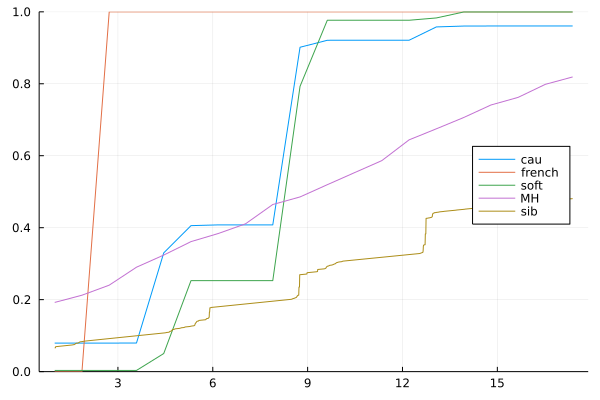

In [357]:
i = 2
round(T)
plot(LinRange(1,T,bins),p_cau[i,:], label = "cau", legend=:right)
plot!(LinRange(1,T,bins),p_french[i,:], label = "french")
plot!(LinRange(1,T,bins),p_soft[i,:], label = "soft")
plot!(LinRange(1,T,bins),p_mh[i,:], label = "MH")
plot!(LinRange(1,T,nsteps_sib),p_sib[i,:], label = "sib")
ylims!(0,1)

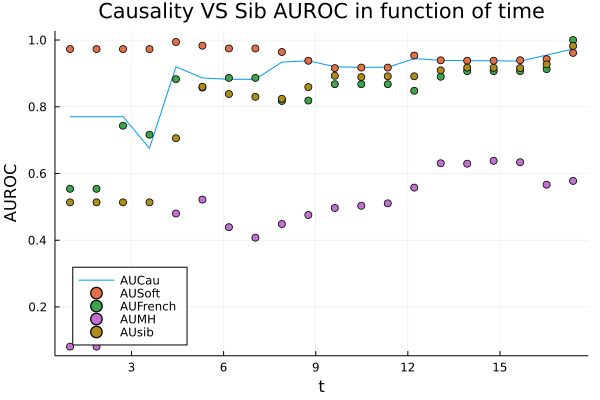

In [358]:
#AUROC curves
AU_curve=zeros(bins)
AU_sib=zeros(bins)
AU_french = zeros(bins)
AU_soft = zeros(bins)
AU_MH = zeros(bins)
for t = 1:bins
    cau_risk=zeros(N)
    sib_risk = zeros(N)
    french_risk = zeros(N)
    MH_risk = zeros(N)
    soft_risk = zeros(N)
    for i=1:N
       cau_risk[i] = p_cau[i,t]
       french_risk[i] = p_french[i,t]
       MH_risk[i] = p_mh[i,t]
       sib_risk[i] = p_sib[i,Int(round(t/bins*nsteps_sib))]
       soft_risk[i] = p_soft[i,t]
    end
    xt = xtrue .< t * T / bins
    AU_soft[t] = AUROC(ROC(xt, soft_risk))
    AU_curve[t] = AUROC(ROC(xt, cau_risk))
    AU_french[t] = AUROC(ROC(xt, french_risk))
    AU_MH[t] = AUROC(ROC(xt, MH_risk))
    AU_sib[t] = AUROC(ROC(xt, sib_risk))
end

plot(LinRange(1,T,bins),AU_curve, label="AUCau", title="Causality VS Sib AUROC in function of time")
scatter!(LinRange(1,T,bins),AU_soft, label="AUSoft",legend=:bottomleft)
scatter!(LinRange(1,T,bins),AU_french, label="AUFrench")
scatter!(LinRange(1,T,bins),AU_MH, label="AUMH")
scatter!(LinRange(1,T,bins), AU_sib, label="AUsib")
xlabel!("t")
ylabel!("AUROC")
#savefig("confronti.pdf")
#ylims!(0.5,1.01)

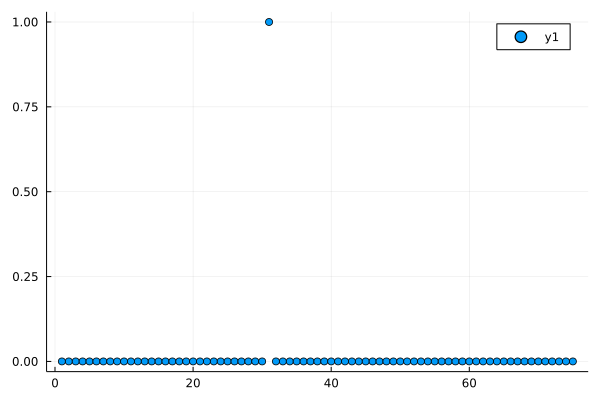

In [331]:
scatter(p_french[:,1])

In [332]:
p_french[34,:]

20-element Vector{Float64}:
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [333]:
O[34]

(34, true, 17.382, 1.0e-5)